# Find Fine Wine
- How can you dine without some fine wine?

## Goal
* Discover drivers of wine quality
* Use drivers to develop clusters or groupings
* Use drivers and clusters to develop a machine learning model to predict wine quality

## Imports

In [1]:
# local imports
import wrangle as w
import explore as e
import modeling as m

### Acquire

- Data acquired from data.world
- Data initially acquired on 23 May 2023
- It contained 6497 rows and 13 columns before cleaning
- Each row represents a red or white variant of the Portuguese "Vinho Verde" wine
- Each column represents a physicochemical property of the wine
- Quality (target) is the median of at least 3 evaluations made by wine experts from 0 (very bad) to 10 (very excellent)

### Prepare

- Identify and handle Nulls
    - No Nulls
- Renamed columns for readability
- Verified data types
- Handle outliers
    - residual sugar < 33
    - free sulfur dioxide < 280
    - chlorides < 0.21
- Create custom features
- Encode categorical variables
- Split data into Train, Validate, Test (approx. 60/20/20)
- Scaled using Standard Scaler for clustering and modeling

In [2]:
# acquire, clean, and prepare the data
df = w.wrangle_wine()

# split into train, validate, and test
train, validate, test = w.split_data(df)

#### A brief look at the data

In [3]:
# taking a peek
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol,quality,wine_type
4327,6.5,0.35,0.28,12.40,0.051,86.0,213.0,0.9962,3.16,0.51,9.9,6,white
3599,6.8,0.31,0.09,1.40,0.040,56.0,145.0,0.9922,3.19,0.46,10.0,5,white
3081,6.7,0.16,0.49,2.40,0.046,57.0,187.0,0.9952,3.62,0.81,10.4,6,white
1945,5.6,0.34,0.10,1.30,0.031,20.0,68.0,0.9906,3.36,0.51,11.2,7,white
3648,6.3,0.28,0.24,8.45,0.031,32.0,172.0,0.9958,3.39,0.57,9.7,7,white


#### Quality Distribution

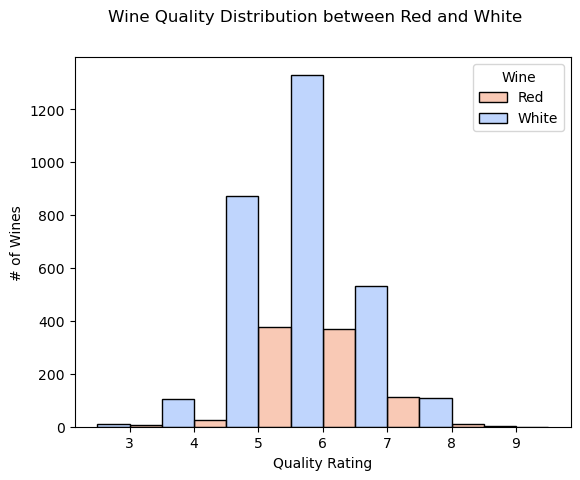

In [4]:
# target distribution
e.dist(train)

## Explore
- Is there a difference between wine type (red and white) and quality?
- Is there a difference between ??? and quality?
- Is there a difference between ??? and quality?
- Is there a difference between clustered alcohol and density with quality?

### Is there a difference between wine type (red/white) and quality?
* $H_0$: There is **NO** difference between wine type and quality
* $H_a$: There is a difference between wine type and quality
* Discrete (wine_type) vs Continuous (quality) = $Mann$-$Whitney$ $U$
    - $Mann$-$Whitney$ $U$ statistic = 1147368.5
    - $p$ = 2.370966170733204e-12
* `Quality` is different based on `wine type`

quality 
____________________
Mann-Whitney Test:
 stat = 1147368.5, p = 2.370966170733204e-12
____________________


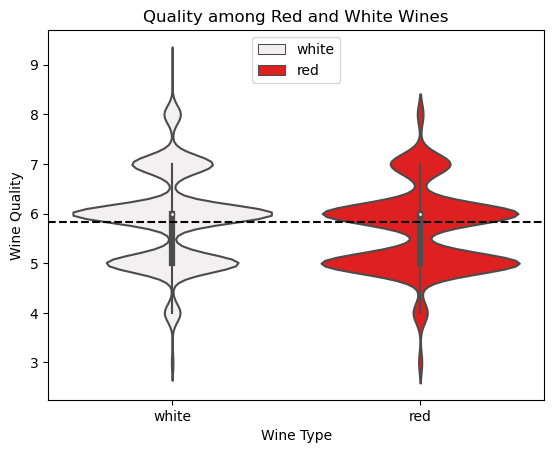

In [5]:
# explore wine type and quality
e.type_quality(train,'wine_type','quality')

**With an alpha of 0.05 (confidence 95%) the p-value is less than alpha. Therefore, evidence suggests that quality is different based on wine type. We believe that splitting `wine_type` for modeling could have a positive impact.**

### Is there a correlation between ??? and quality?
* $H_0$: There is **NO** correlation between ??? and quality
* $H_a$: There is a correlation between ??? and quality
* Continuous (???) vs Continuous (quality) = $Spearman's R$
    - $r$ = 
    - $p$ = 
* `???` is correlated with `quality`

In [6]:
# explore ??? and quality


**With an alpha of 0.05 (confidence 95%) the p-value is ??? than alpha. Therefore, evidence suggests that ??? and quality are correlated with each other. I believe that using `???` in the modeling could have a positive impact.**

### Is there a difference for white wines between clustered density and alcohol with quality?
* $H_0$: There is **NO** difference between the density alcohol cluster and quality
* $H_a$: There is a difference between the density alcohol cluster and quality
* Discrete (density_alcohol) vs Continuous (quality) = $Mann$-$Whitney$ $U$
    - $Mann$-$Whitney$ $U$ statistic = 
    - $p$ = 
* White wine `quality` is different based on the `density alcohol cluster`

In [7]:
# explore clustered density alcohol and quality


**With an alpha of 0.05 (confidence 95%) the p-value is ??? than alpha. Therefore, evidence suggests that ??? and quality are correlated with each other. I believe that using `???` in the modeling could have a positive impact.**

### Is there a correlation between ??? and quality?
* $H_0$: There is **NO** correlation between ??? and quality
* $H_a$: There is a correlation between ??? and quality
* Continuous (???) vs Continuous (quality) = $Spearman's R$
    - $r$ = 
    - $p$ = 
* `???` is correlated with `quality`

In [8]:
# explore ??? and quality


**With an alpha of 0.05 (confidence 95%) the p-value is ??? than alpha. Therefore, evidence suggests that ??? and quality are correlated with each other. I believe that using `???` in the modeling could have a positive impact.**

## Exploration Summary 
- Split into two categories
    - red wines
    - white wines


### Features for Modeling
- Features that will be used:
    - quality (target)
- Some features that may be useful:
    - fixed_acidity
    - volatile_acidity
    - chlorides
    - free_so2
    - total_so2
    - alcohol

## Modeling
- RMSE will be the evaluation metric
- Target is quality
- Using mean of the quality as baseline
    - Red Baseline Mean: 5.66    RMSE: 0.88
    - White Baseline Mean: 5.88  RMSE: 0.88
- Features scaled using Standard Scaler
- Models will be developed using a few different types, various features, and various hyperparameter configurations
    - different models for red and white wines
    - Linear Regression
    - Polynomial Features through Linear Regression
    - Polynomial Features with a KMeans Cluster
    - Lasso Lars was worse than baseline so left behind
    - Tweedie Regressor (GLM)
- Models will be evaluated on Train and Validate
- Best performing model will only be evaluated on Test

In [9]:
# get baseline
m.baseline(train,validate)

Baseline    Red:  5.66  White: 5.88
Train       RMSE: 0.88  RMSE:  0.88
Validate    RMSE: 0.87  RMSE:  0.87


In [10]:
# split into X and y, red and white
Xr_train, Xr_val, Xr_test = train[train.wine_type=='red'].drop(columns=['quality','wine_type']),validate[validate.wine_type=='red'].drop(columns=['quality','wine_type']),test[test.wine_type=='red'].drop(columns=['quality','wine_type'])
Xw_train, Xw_val, Xw_test = train[train.wine_type=='white'].drop(columns=['quality','wine_type']),validate[validate.wine_type=='white'].drop(columns=['quality','wine_type']),test[test.wine_type=='white'].drop(columns=['quality','wine_type'])
yr_train, yr_val, yr_test = train[train.wine_type=='red'][['quality']],validate[validate.wine_type=='red'][['quality']],test[test.wine_type=='red'][['quality']]
yw_train, yw_val, yw_test = train[train.wine_type=='white'][['quality']],validate[validate.wine_type=='white'][['quality']],test[test.wine_type=='white'][['quality']]

# standard scaler
Xrs_train,Xrs_val,Xrs_test = w.std(Xr_train,Xr_val,Xr_test)
Xws_train,Xws_val,Xws_test = w.std(Xw_train,Xw_val,Xw_test)

### Best 4 Model Configurations

#### Linear Regression

In [11]:
# linear regression results
m.final_models('lr',Xrs_train,Xws_train,yr_train,yw_train,Xrs_val,Xws_val,yr_val,yw_val)

Linear Reg  Red:        White:
Train       RMSE: 0.64  RMSE:  0.77
Validate    RMSE: 0.68  RMSE:  0.74


#### Polynomial Features

In [12]:
# polynomial features results
m.final_models('poly',Xrs_train,Xws_train,yr_train,yw_train,Xrs_val,Xws_val,yr_val,yw_val)

Polynomial  Red:        White:
Train       RMSE: 0.6  RMSE:  0.71
Validate    RMSE: 0.69  RMSE:  0.7


#### Polynomial Features with respective KMeans Cluster

In [13]:
# poly cluster results
m.cluster_model(Xrs_train,Xws_train,yr_train,yw_train,Xrs_val,Xws_val,yr_val,yw_val)

Linear Reg  Red:        White:
Train       RMSE: 0.62  RMSE:  0.75
Validate    RMSE: 0.68  RMSE:  0.74


#### Tweedie Regressor

In [14]:
# tweedie results
m.final_models('tweedie',Xrs_train,Xws_train,yr_train,yw_train,Xrs_val,Xws_val,yr_val,yw_val)

Tweedie     Red:        White:
Train       RMSE: 0.68  RMSE:  0.8
Validate    RMSE: 0.71  RMSE:  0.78


### Best to Test
- Polynomial Features for white wine

In [15]:
# best model eval with test data
m.test_model(Xrs_train,Xws_train,yr_train,yw_train,Xrs_test,Xws_test,yr_test,yw_test)

Poly Cluster  Red:        White:
Test          RMSE: 0.61  RMSE:  0.73


#### How does it compare?

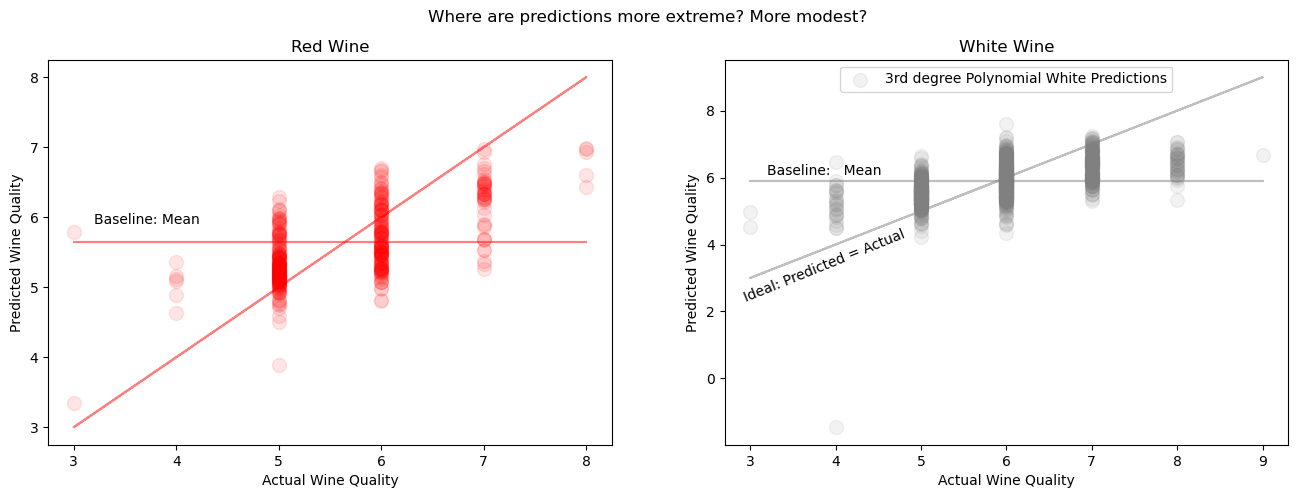

In [16]:
# plot predictions vs actual on test
m.plt_err(Xrs_train,Xws_train,yr_train,yw_train,Xrs_test,Xws_test,yr_test,yw_test)

### Modeling Wrap Up
- ???

## Conclusion

### Takeaways and Key Findings
- ???

### Recommendations and Next Steps
- ???
- Just go to the store and get some $10 wine since it will probably taste just fine